In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Sample file, from Dec 2024
# https://mbta-massdot.opendata.arcgis.com/datasets/924df13d845f4907bb6a6c3ed380d57a/about
filename = "MBTA-Bus-Arrival-Departure-Times_2024-12.csv"


In [3]:
df = pd.read_csv(filename, low_memory=False)

In [4]:
print(df.head())
print(df.shape)
print(df.describe)

  service_date route_id direction_id  half_trip_id  stop_id time_point_id  \
0   2024-12-01       01      Inbound    65184787.0      110         hhgat   
1   2024-12-01       01      Inbound    65184787.0       67         maput   
2   2024-12-01       01      Inbound    65184787.0       72         cntsq   
3   2024-12-01       01      Inbound    65184787.0       75           mit   
4   2024-12-01       01      Inbound    65184787.0       79         hynes   

   time_point_order  point_type standard_type             scheduled  \
0                 1  Startpoint      Schedule  1900-01-01T11:05:00Z   
1                 2    Midpoint      Schedule  1900-01-01T11:09:00Z   
2                 3    Midpoint      Schedule  1900-01-01T11:12:00Z   
3                 4    Midpoint      Schedule  1900-01-01T11:15:00Z   
4                 5    Midpoint      Schedule  1900-01-01T11:19:00Z   

                 actual  scheduled_headway  headway  
0  1900-01-01T11:06:17Z                NaN      NaN  
1 

In [5]:
# Calculate delay for each station in seconds
df['time_difference'] = pd.to_datetime(df['actual']) - pd.to_datetime(df['scheduled'])
df['delay_seconds'] = df['time_difference'].dt.total_seconds()



In [6]:
# Calculate headway delay for each station in seconds 
# Headway is the amount of time that has passed since the previous bus stopped at the station
df['delay_headway'] = df['headway'] - df['scheduled_headway']

In [ ]:
# Save as a CSV if wanted, optional to check manually
df.to_csv('MBTA-Bus-Arrival-Departure-Times_2024-12-with-delay.csv', index=False)

In [7]:
# Understanding where data is missing, what gaps there might be
df['delay_seconds'] = pd.to_numeric(df['delay_seconds'], errors='coerce')
total_count = df.shape[0]
incomplete_count = df['delay_seconds'].isna().sum()

print("Number of total results in delay_seconds:", total_count)
print("Number of incomplete results in delay_seconds:", incomplete_count)
print("Percent incomplete:", incomplete_count/total_count)

Number of total results in delay_seconds: 2367899
Number of incomplete results in delay_seconds: 208393
Percent incomplete: 0.08800755437626351


In [8]:
df['delay_headway'] = pd.to_numeric(df['delay_headway'], errors='coerce')
total_count = df.shape[0]

incomplete_count = df['delay_headway'].isna().sum()

print("Number of total results in delay_headway:", total_count)
print("Number of incomplete results in delay_headway:", incomplete_count)
print("Percent incomplete:", incomplete_count/total_count)

Number of total results in delay_headway: 2367899
Number of incomplete results in delay_headway: 1418317
Percent incomplete: 0.5989769833932951


In [9]:
# Shows that some routes don't calculate headway, might be a result of station location / if it's an endpoint, need to look into more

grouped = df.groupby(['route_id'])

result = grouped['delay_headway'].agg(
    total_count='size',  
    incomplete_count=lambda x: x.isna().sum() 
)

# Calculate the percent incomplete for each group
result['percent_incomplete'] = result['incomplete_count'] / result['total_count']

for result in result.iterrows():
  print(f"Route: {result[0]}, percent incomplete: {result[1][2]}")

Route: 01, percent incomplete: 0.11530470254093517
Route: 04, percent incomplete: 0.9811031664964249
Route: 07, percent incomplete: 0.4045902506779549
Route: 08, percent incomplete: 1.0
Route: 09, percent incomplete: 0.49330231246474904
Route: 10, percent incomplete: 1.0
Route: 100, percent incomplete: 1.0
Route: 101, percent incomplete: 0.9389582842328541
Route: 104, percent incomplete: 0.3324914675767918
Route: 105, percent incomplete: 1.0
Route: 106, percent incomplete: 1.0
Route: 108, percent incomplete: 0.9648067104303428
Route: 109, percent incomplete: 0.27175970935884974
Route: 11, percent incomplete: 0.8956349206349207
Route: 110, percent incomplete: 0.2984473116935862
Route: 111, percent incomplete: 0.1002196645123811
Route: 112, percent incomplete: 1.0
Route: 114, percent incomplete: 1.0
Route: 116, percent incomplete: 0.14262356936234435
Route: 117, percent incomplete: 0.22308015107007972
Route: 119, percent incomplete: 1.0
Route: 120, percent incomplete: 0.9945360085990684


C:\Users\Michael\AppData\Local\Temp\ipykernel_14840\803278065.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Route: {result[0]}, percent incomplete: {result[1][2]}")


In [28]:
# Same with some stops, will try grouping by location to see if there's a cause or a way it can be mitigated

grouped = df.groupby(['stop_id'])

result = grouped['delay_headway'].agg(
    total_count='size',  
    incomplete_count=lambda x: x.isna().sum() 
)

# Calculate the percent incomplete for each group
result['percent_incomplete'] = result['incomplete_count'] / result['total_count']

for result in result.iterrows():
  print(f"Stop: {result[0]}, percent incomplete: {result[1][2]}")

Stop: 2, percent incomplete: 0.18099089989888775
Stop: 5, percent incomplete: 0.17444601603017446
Stop: 7, percent incomplete: 1.0
Stop: 8, percent incomplete: 1.0
Stop: 13, percent incomplete: 0.8442340030091159
Stop: 20, percent incomplete: 1.0
Stop: 21, percent incomplete: 0.5080399826162538
Stop: 25, percent incomplete: 0.7285902503293807
Stop: 33, percent incomplete: 0.6990489734245845
Stop: 41, percent incomplete: 0.6389435234616465
Stop: 45, percent incomplete: 0.6381005900533858
Stop: 55, percent incomplete: 0.20564885496183205
Stop: 58, percent incomplete: 1.0
Stop: 59, percent incomplete: 0.09052778748689269
Stop: 62, percent incomplete: 0.10535526776338817
Stop: 64, percent incomplete: 0.33435684647302905
Stop: 65, percent incomplete: 0.9744245524296675
Stop: 67, percent incomplete: 0.11165558277913895
Stop: 72, percent incomplete: 0.38315660685154973
Stop: 75, percent incomplete: 0.10955547777388869
Stop: 79, percent incomplete: 0.08843061866480252
Stop: 93, percent incompl

C:\Users\Michael\AppData\Local\Temp\ipykernel_24884\2498612258.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Stop: {result[0]}, percent incomplete: {result[1][2]}")


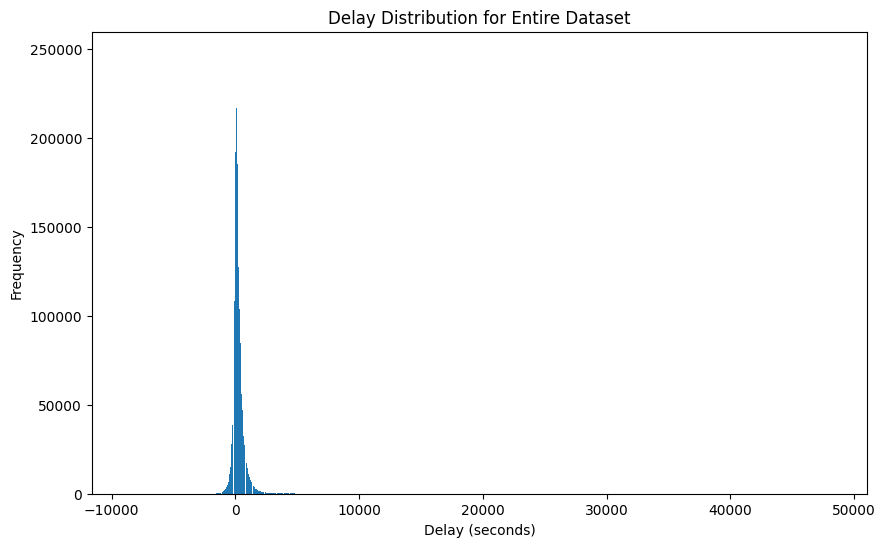

In [10]:
# For now will only look at delay and not headway delay, much more consistent with less missing

delays = df['delay_seconds'].dropna()

counts, bin_edges = np.histogram(delays, bins=1000)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]) * 0.9)
plt.title("Delay Distribution for Entire Dataset")
plt.xlabel("Delay (seconds)")
plt.ylabel("Frequency")
plt.show()


# Have issues with outliers, will exclude results over +-1200 seconds (20 minutes) to address miscalculations
# Rough solution for now, can look into further to see if there's an issue with how date is displayed in some cases

In [13]:
filtered_df = df[(df['delay_seconds'] >= -1200) & (df['delay_seconds'] <= 1200)]
grouped = filtered_df.groupby(['stop_id'])


# Calculate aggregate statistics for each group: average delay, minimum delay, maximum delay.
stats = grouped['delay_seconds'].agg(average_delay='mean',
                                      min_delay='min',
                                      max_delay='max')

print(stats)



# For now ignoring headway delay, very useful but need to look more into what's causing the delay

         average_delay  min_delay  max_delay
stop_id                                     
2           165.146444     -908.0     1188.0
5           203.238887    -1200.0     1199.0
7           269.168363     -640.0     1194.0
8           573.310345     -426.0     1115.0
13          157.594771    -1197.0     1200.0
...                ...        ...        ...
96459       316.804469     -293.0     1164.0
98618       110.345345    -1029.0     1199.0
99832       254.013333     -322.0     1178.0
99991       160.240250    -1066.0     1169.0
883321      197.265896     -345.0     1113.0

[1143 rows x 3 columns]


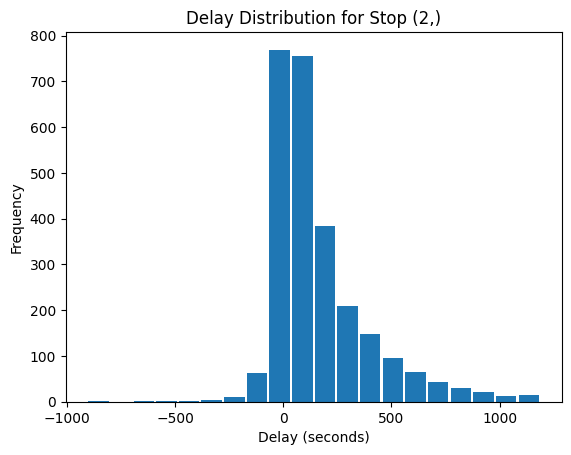

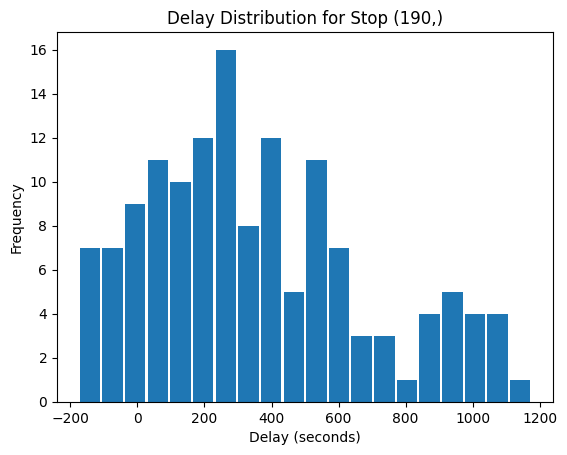

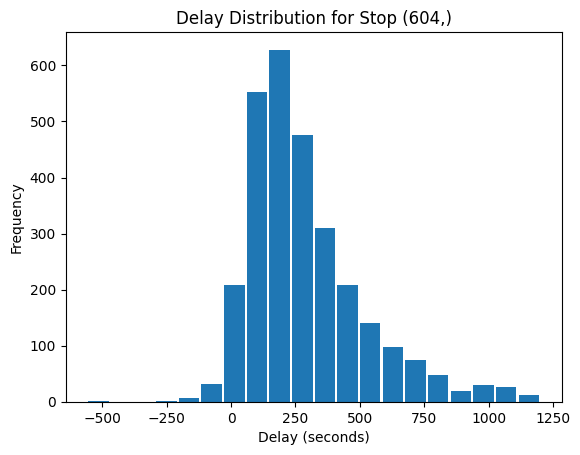

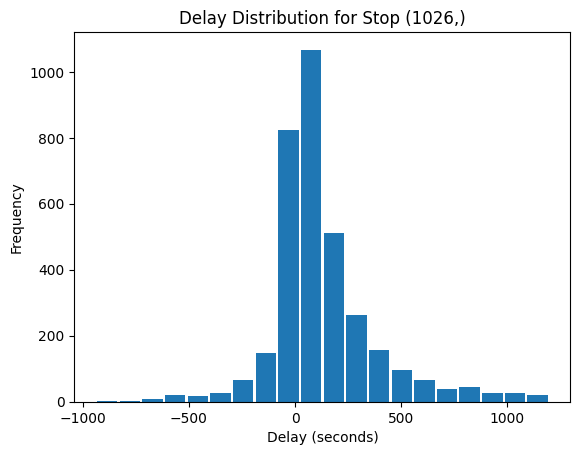

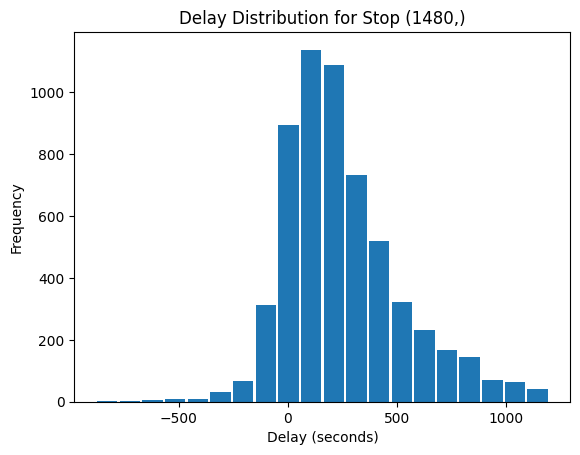

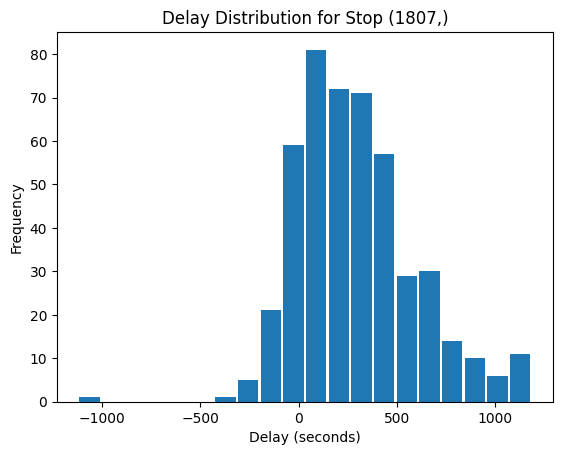

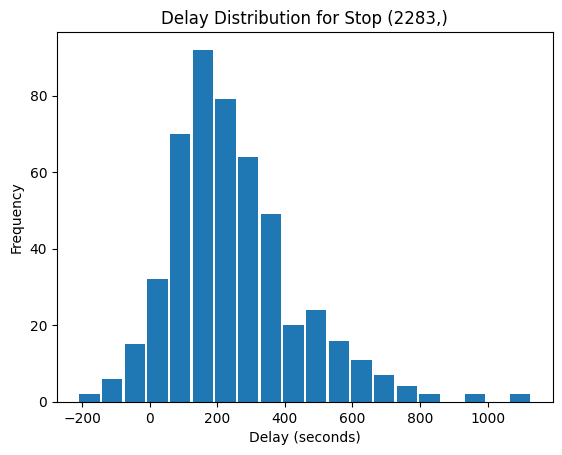

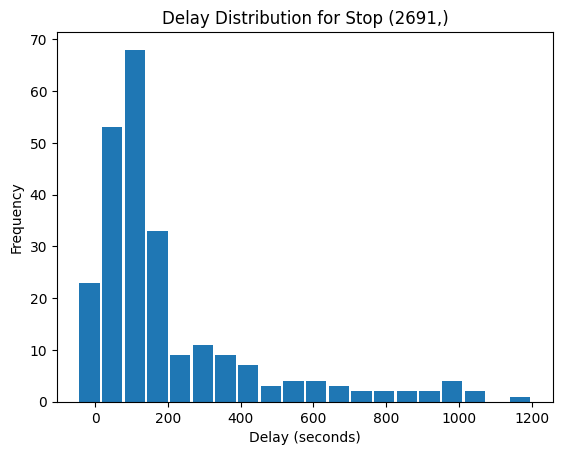

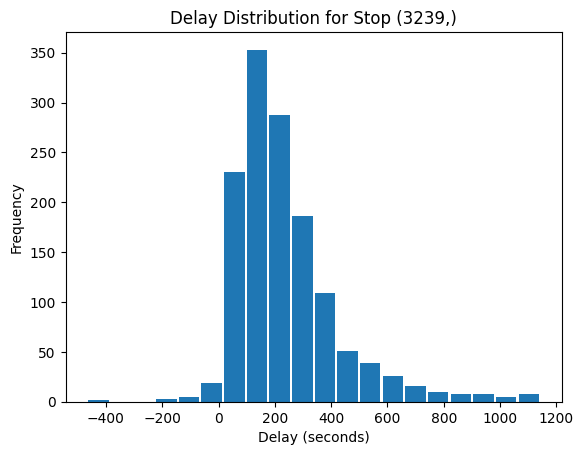

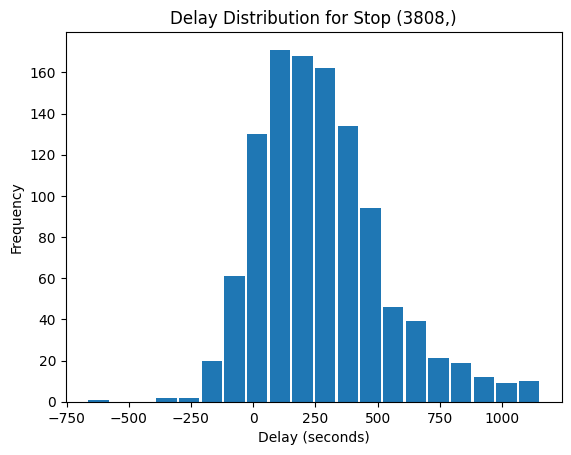

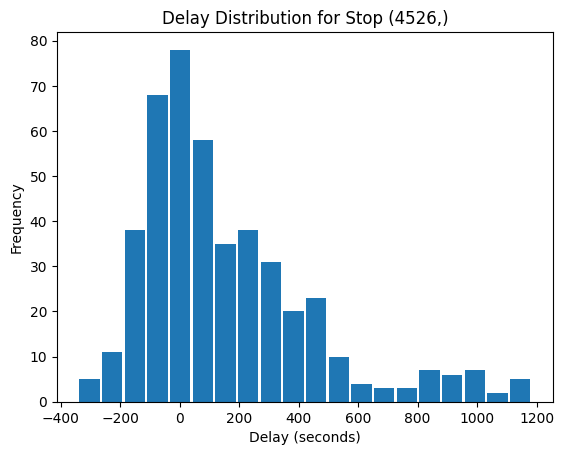

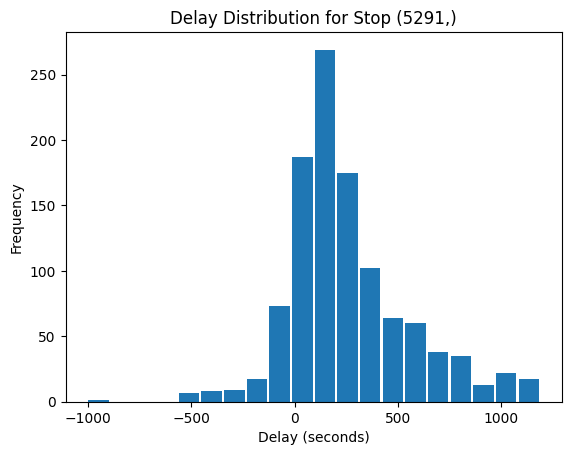

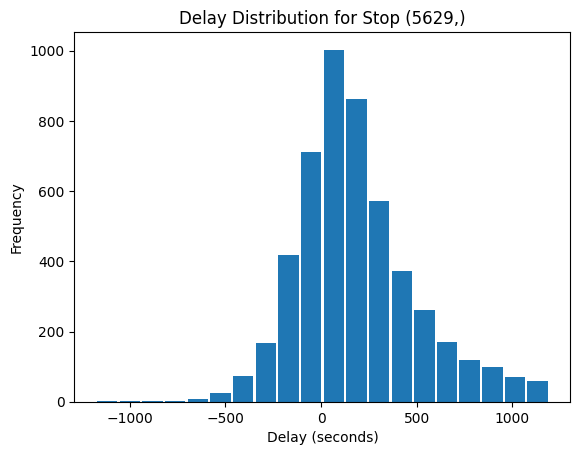

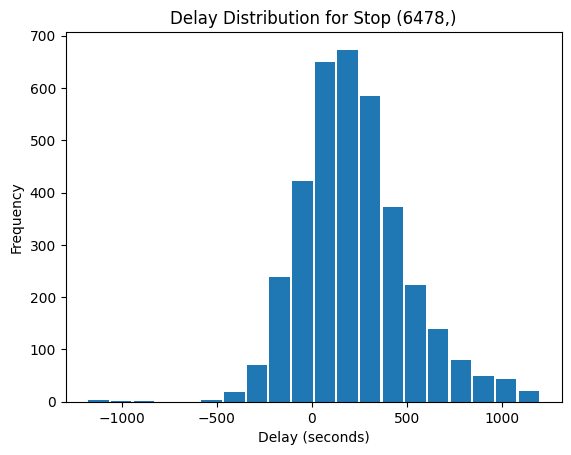

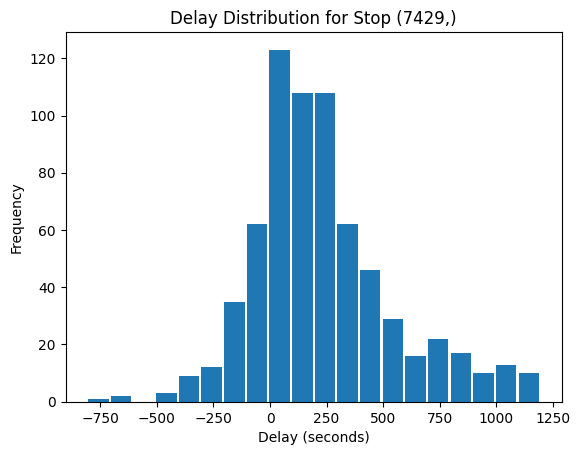

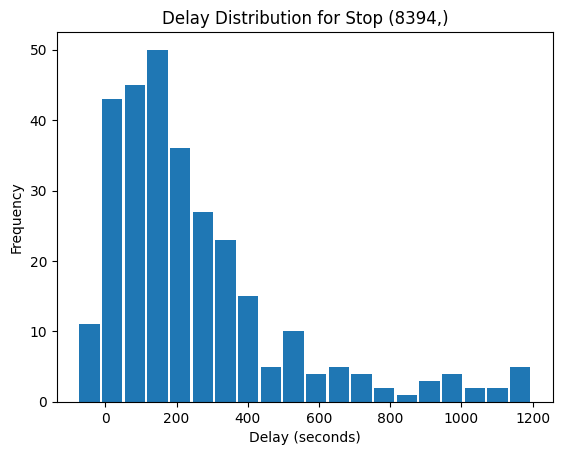

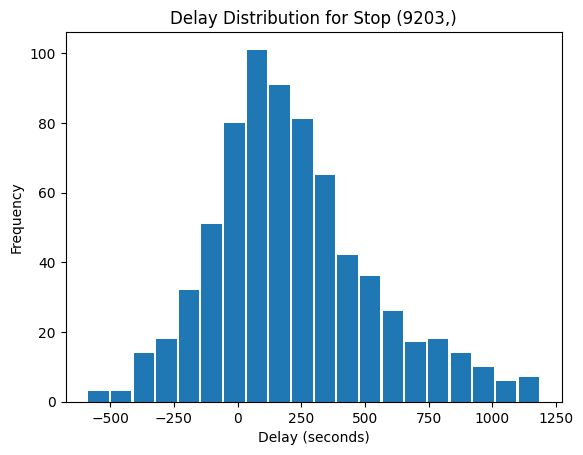

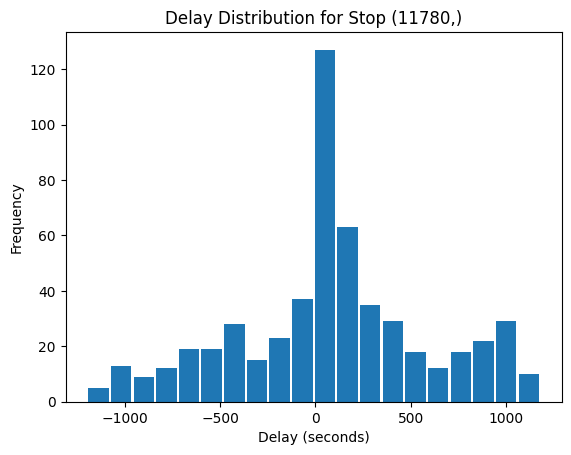

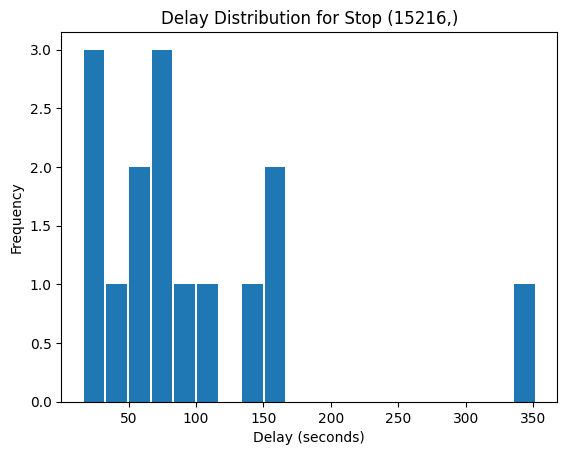

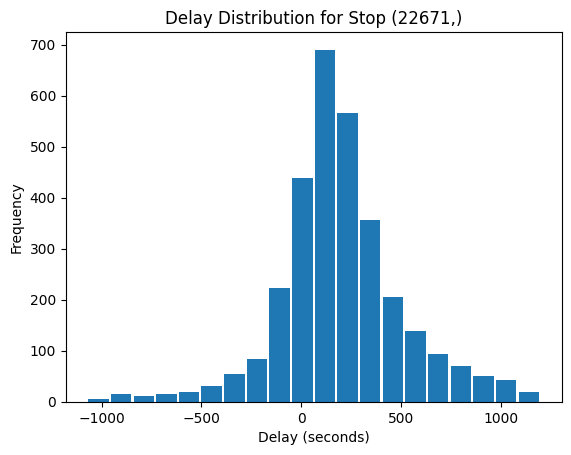

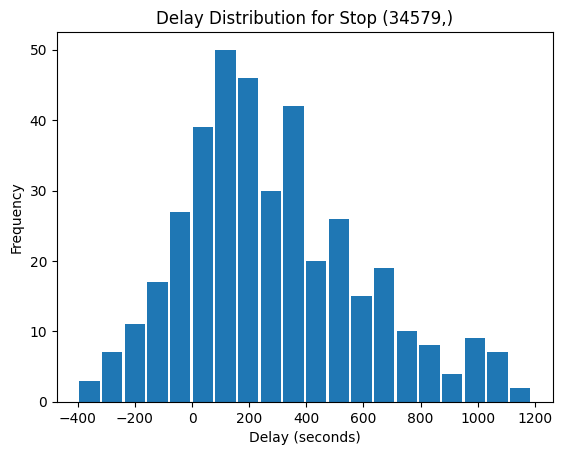

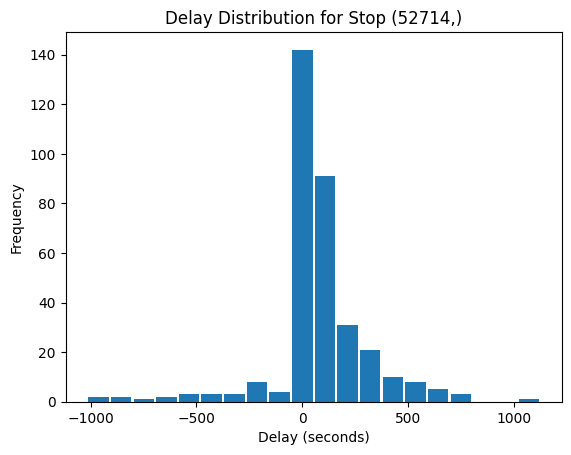

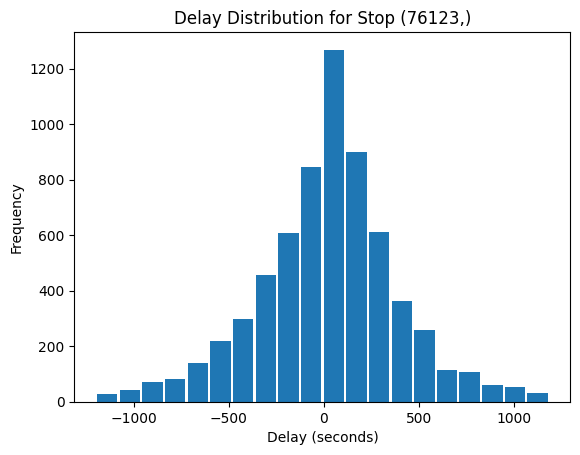

In [14]:
# Create histograms of the delays to get a rough understanding of delay distribution for some stops

count = 0

for stop, group in grouped:

    if count % 50 == 0:

      delays = group['delay_seconds'].dropna()
      

      if delays.empty:
          continue


      counts, bin_edges = np.histogram(delays, bins=20)
      

      bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
      

      plt.figure()
      plt.bar(bin_centers, counts, width=(bin_edges[1]-bin_edges[0]) * 0.9)
      plt.title(f"Delay Distribution for Stop {stop}")
      plt.xlabel("Delay (seconds)")
      plt.ylabel("Frequency")
      plt.show()

    count = count + 1 # only want to get a rough understanding, don't need 1000+ diagrams


C:\Users\Michael\AppData\Local\Temp\ipykernel_14840\2189920547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['abs_delay'] = filtered_df['delay_seconds'].abs()


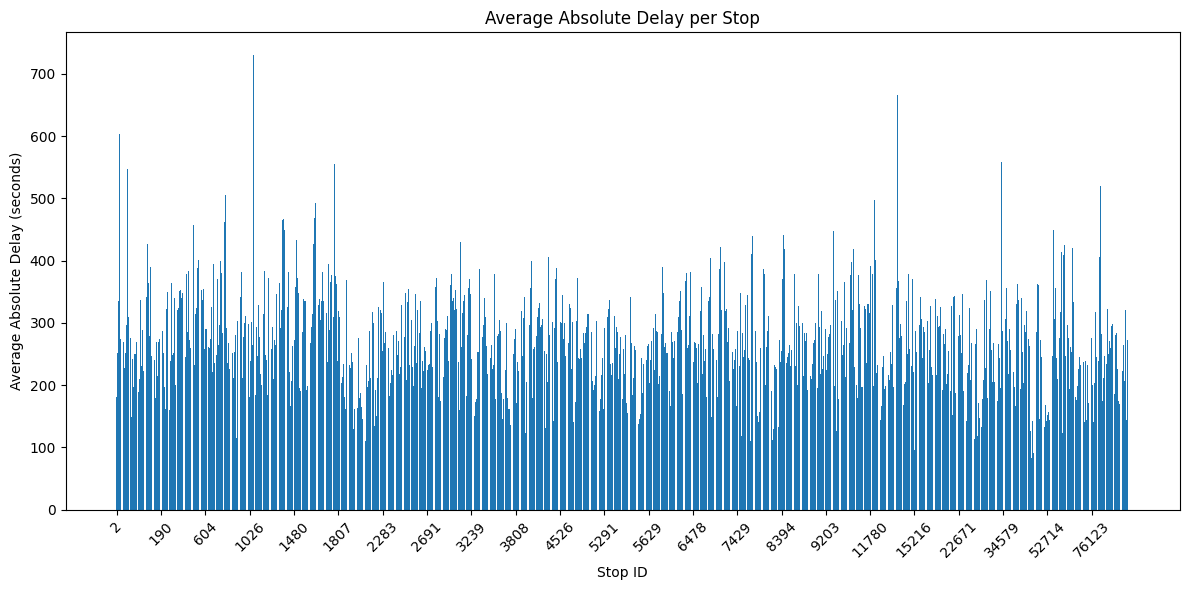

In [15]:
filtered_df['abs_delay'] = filtered_df['delay_seconds'].abs()

stats = filtered_df.groupby('stop_id')['abs_delay'].agg(
    average_delay='mean',
    min_delay='min',
    max_delay='max'
).reset_index()

stops = stats['stop_id'].astype(str).tolist()
avg_delays = stats['average_delay'].tolist()

x_positions = np.arange(len(stops))

plt.figure(figsize=(12, 6))
plt.bar(x_positions, avg_delays)


tick_interval = 50
plt.xticks(x_positions[::tick_interval], [stops[i] for i in x_positions[::tick_interval]], rotation=45)

plt.xlabel('Stop ID')
plt.ylabel('Average Absolute Delay (seconds)')
plt.title('Average Absolute Delay per Stop')
plt.tight_layout()
plt.show()


In [ ]:
# # Load Bus Stop data for ArcGIS Analysis
pati_df = pd.read_csv("PATI_Bus_Stops.csv", low_memory=False)

In [16]:
# Add percentile categories to the average delay 
stats['percentile'] = stats['average_delay'].rank(pct=True) * 100
stats['percentile_cat'] = np.minimum((stats['percentile'] // 10).astype(int), 9)



In [ ]:
pati_df_renamed = pati_df.rename(columns={'Stop_ID': 'stop_id'})

merged_stats = stats.merge(pati_df_renamed[['stop_id', 'Longitude', 'Latitude']], on='stop_id', how='left')


In [ ]:
# Save for ArcGIS Analysis
merged_stats.to_csv('MBTA-Delay-Categories-With_Coords-2024-12.csv', index=False)